In [ ]:
# datasets #
# ======== #
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
titanic_path = "../datasets/titanic/train.csv"
bike_path = "../datasets/bike-sharing-demand/train.csv"
X_iris, y_iris = datasets.load_iris(return_X_y=True, as_frame=True)
df_iris = pd.concat([X_iris, y_iris], axis=1)
X_diab, y_diab = datasets.load_diabetes(return_X_y=True, as_frame=True)
df_diab = pd.concat([X_diab, y_diab], axis=1)
boston = datasets.load_boston()
X_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
y_boston = pd.DataFrame(boston.target, columns=['TARGET'])


import warnings
warnings.filterwarnings('ignore')

plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='AppleGothic')
plt.style.use('fivethirtyeight')
sns.set_context("notebook", font_scale=1.5)
%matplotlib inline

# Supervised Learning

## Before Regression

### 회귀모델 성능지표
- MSE: 예측값과 실제값의 오차제곱합
    - RMSE, MAE, MAPE
- R^2: 변수의 분산성이 총분산성을 얼마나 설명하는가?
- Adjusted R^2: R^2에 변수 수만큼 penalty를 부과한 꼴
- AIC: MSE에 변수 수만큼 penalty를 부과한 꼴
- BIC: AIC를 보완한 지표

### 다중공선성 진단법
- "다중공선성은 회귀모델의 성능을 떨어뜨린다"
    - "y에 대한 x 변수들의 설명력이 서로 겹치는 상황"
- VIF: 변수들 간의 correlation을 판단
    - 일반적으로 VIF가 10이 넘으면 다중공선성을 의심한다.

### 다중공선성 해결법
- 변수선택법(feature selection): 변수를 추가/제거해가며 모델의 성능지표(AIC 등)을 비교
    - 전진선택, 후진소거, Stepwise
- 변수제거
- 회귀계수 축소(regression regularization)
    - Ridge, Lasso, ElasticNet

### 회귀분석의 적합성 진단
- 성능지표가 높게 나오더라도 이 회귀모델이 '적합한가'에 대한 진단이 필요한데, 이 진단을 '잔차분석'으로 한다.
- 잔차에 대한 세 가지 가정
    - 정규성: 잔차는 정규분포를 따른다.
        - qq plot을 통해 잔차가 정규분포를 따르는지 확인한다.
    - 독립성: t 시점 잔차와 t+1 시점 잔차에 상관성이 없다.
        - (t 시점 잔차 ~ t+1 시점 잔차) 산점도로 corr을 확인한다.
    - 등분산성: 예측값(y-hat)이 작든 크든 잔차의 분산이 일정하다.
        - (y-hat ~ resid) 산점도로 분산이 일정한지 확인한다.


### 기타) 분류모델 성능지표
- 정확도(accuracy)
- 정밀도(precision), 재현율(recall), 특이도(speicifity)
- G-mean: (specificity * recall)^-1
- F1 measure: 2 * [(precision * recall) / (precision + recall)]
- ROC curve, AUC

## Linear Regresson

- 모델링, model performance 확인 (#doc_models)
    - 상관분석 (correlation) 수식
- (#Raschka_4)
- 다중공선성 진단법 (vif) (#doc_models)
    - 해결법은 general 확인
- 적합성 진단 - 잔차분석 (#doc_models)
- ridge, lasso (# doc_models)

In [2]:
X_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## Logistic Regression

- 로지스틱 회귀는 기본적으로 '이진분류를 위한 선형모델'이다.
    - 다중 클래스 환경에서 사용하기 위해 "OvR" 기법을 사용할 수 있다.<br>

오즈비(특정 이벤트가 발생할 확률) $=\dfrac{P}{1-P}$ , ($P$는 양성 샘플에 대한 확률) 여기서 양성샘플이란 "예측하려는 대상"

로짓 함수 : $logit(P)=log\dfrac{P}{1-P}$

$0\le P \le 1$이면, $0 \le \dfrac{P}{1-P} \le \infty$이고, $-\infty \le log\dfrac{P}{1-P} \le \infty$이므로

$log\dfrac{P}{1-P}=\boldsymbol{w}^T\boldsymbol{x}$처럼 쓸 수 있다. <br>

- $logit(P(y=1|x)) = \boldsymbol{w}^T\boldsymbol{x}$
    - 위 식의 의미는 특성 $\boldsymbol{x}$가 주어졌을 때 이 샘플이 클래스 1에 속할 조건부 확률이다.

> 어떤 샘플이 특정 클래스에 속할 확률을 예측하는 것이 관심 대상이므로 logit 함수를 거꾸로 뒤집는다. => 이를 로지스틱 시그모이드 함수, 또는 시그모이드 함수라고 한다. (함수 모양이 s자 형태라서 시그모이드 함수..)<br><br>

양성 샘플일 확률 $P = \dfrac{1}{1+e^{-\boldsymbol{w}^T\boldsymbol{x}}}=\dfrac{1}{1+e^{-z}}$

In [3]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

df = pd.read_csv(bike_path)
df = sm.add_constant(df, has_constant='add')

In [4]:
df['registered_more_than_5'] = df['registered'].apply(lambda x: 1 if x > 5 else 0)

In [5]:
X = df.drop(['datetime', 'registered_more_than_5'], axis=1)
y = df['registered_more_than_5']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.3
)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7620, 12) (3266, 12) (7620,) (3266,)


In [7]:
# logistic modelling and fitting
logit = sm.Logit(y_train, X_train)
fitted_logit = logit.fit(method='newton')

         Current function value: 0.000000
         Iterations: 35


/Users/jihunkang/.pyenv/versions/3.9.1/envs/main/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [44]:
# summary
fitted_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             Logit Regression Results                             
==================================================================================
Dep. Variable:     registered_more_than_5   No. Observations:                 7620
Model:                              Logit   Df Residuals:                     7608
Method:                               MLE   Df Model:                           11
Date:                    Sun, 29 Jan 2023   Pseudo R-squ.:                  0.9994
Time:                            01:49:19   Log-Likelihood:                -1.1607
converged:                          False   LL-Null:                       -2108.1
Covariance Type:                nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -67.1110     17.941     -3.741      0.000    -102.275     -31.947
season         0.1516      1.056      0.144      0.886      -1.918       2.221
holiday        1.4029      5.698      0.246      0.806      -9.766      12.572
workingday     0.2057      2.924      0.070      0.944      -5.526       5.938
weather       -1.0445      1.937     -0.539      0.590      -4.841       2.752
temp          -0.1910      1.203     -0.159      0.874      -2.549       2.167
atemp          0.1162      1.104      0.105      0.916      -2.048       2.280
humidity       0.0418      0.072      0.579      0.563      -0.100       0.183
windspeed      0.1050      0.137      0.767      0.443      -0.163       0.373
casual        -3.7493        nan        nan        nan         nan         nan
registered     7.7346        nan        nan        nan         nan         nan
count          3.9853        nan        nan        nan         nan         nan
==============================================================================

Possibly complete quasi-separation: A fraction 0.97 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [45]:
# params (회귀계수)
fitted_logit.params

const        -67.110980
season         0.151611
holiday        1.402930
workingday     0.205692
weather       -1.044469
temp          -0.190953
atemp          0.116225
humidity       0.041827
windspeed      0.105008
casual        -3.749257
registered     7.734619
count          3.985344
dtype: float64

In [46]:
np.exp(fitted_logit.params)
## atemp가 1단위 높을수록 종속변수가 1일 확률이 1.12배 높다

const         7.146141e-30
season        1.163708e+00
holiday       4.067099e+00
workingday    1.228375e+00
weather       3.518786e-01
temp          8.261717e-01
atemp         1.123249e+00
humidity      1.042714e+00
windspeed     1.110719e+00
casual        2.353523e-02
registered    2.286137e+03
count         5.380377e+01
dtype: float64

### Logistic 모델 성능지표 확인

In [53]:
# y-hat
pred_y = fitted_logit.predict(X_test)

# logit의 pred 값이 1 혹은 0이 되도록 하는 함수 정의
def cut_off(y, threshold):
    Y = y.copy()
    Y[Y > threshold] = 1
    Y[Y <= threshold] = 0
    return (Y.astype(int))

pred_Y = cut_off(pred_y, 0.5)
pred_Y

4380    1
141     0
7469    1
941     1
1368    1
       ..
9070    1
5444    1
3223    1
752     1
5010    1
Length: 3266, dtype: int64

In [57]:
# confusion matrix
cfmat = confusion_matrix(y_test, pred_Y)
print(cfmat)

print('accuracy : ', (cfmat[0,0] + cfmat[1,1]) / len(pred_Y))
print('accuracy : ', accuracy_score(y_test, pred_Y))

[[ 259    0]
 [   0 3007]]
accuracy :  1.0
accuracy :  1.0


In [58]:
threshold = np.arange(0, 1, 0.1)
table = pd.DataFrame(columns=['ACC'])
for i in threshold:
    pred_Y = cut_off(pred_y, i)
    cfmat = confusion_matrix(y_test, pred_Y)
    table.loc[i] = accuracy_score(y_test, pred_Y)
table.index.name = 'threshold'
table.columns.name = 'performance'
table

performance,ACC
threshold,
0.0,0.920698
0.1,1.000000
0.2,1.000000
0.3,1.000000
0.4,1.000000
0.5,1.000000
0.6,1.000000
0.7,1.000000
0.8,1.000000


- 파이썬으로 경사하강법 적용 로지스틱 분류기 구현 (#Raschka_1)
- 모델링, model performance 확인 (#doc_models)
- feature selection 함수 만들기(#doc_models)

## Gaussian Naive Bayes

## (참고) 모델별 특징
> - 모델 해석이 중요할 때는 결정 트리가 사용하기 좋다.
> - 로지스틱 회귀는 stochastic gradient descent을 사용한 온라인 학습뿐 아니라 특정 이벤트 확률을 예측하는 것에도 사용 가능하다.
> - SVM은 강력한 선형 모델이지만 커널 트릭을 사용하여 비선형 문제에도 확장 가능하다. 또한 이 모델은 예측 성능을 높이기 위해 튜닝할 하이퍼파라미터가 많다.
> - 랜덤 포레스트 같은 앙상블 모델은 매개변수 튜닝이 많이 필요하지 않고, 결정 트리만큼 쉽게 과대적합되지 않는다.
> - KNN 분류기는 모델 훈련 없이 예측을 만들지만 예측 단계의 계산 비용이 높다.

## Support Vector Machine

## KNN
> KNN은 비모수 모델(nonparametric model)에 속하는 인스턴스 기반 모델이다. 인스턴스 기반 모델은 훈련 데이터셋을 메모리에 저장하는 것이 특징이다.

1. 숫자 k와 거리 측정 기준을 선택한다.
2. 분류하려는 샘플에서 k개의 최근접 이웃을 찾는다.
3. 다수결 투표를 통해 클래스 레이블을 할당한다.<br><br>

- 이런 메모리 기반 방식의 분류기는 수집된 새로운 훈련 데이터에 즉시 적용할 수 있는 것이 장점
- 새로운 샘플을 분류하는 계산 복잡도는 단점
- 훈련 단계가 없기 때문에 훈련 샘플을 버릴 수 없는 것도 단점
- 게다가 차원의 저주 때문에 과대적합되기 쉽다.
    - "고정된 크기의 훈련 데이터셋이 차원이 늘어남에 따라 특성 공간이 점점 희소해짐 => 고차원 공간에서는 가장 가까운 이웃이라도 좋은 추정 값을 만들기에는 너무 멀리 떨어져 있다."
    - 로지스틱 회귀에서는 과대적합을 피하기 위해 Regularization을 사용했는데, 결정 트리나 KNN처럼 regularization을 적용할 수 없는 모델에서는 '특성 선택'과 '차원 축소 기법'을 이용하기도 한다.

In [15]:
Image(url='https://git.io/Jtm25', width=400)

In [7]:
from sklearn import neighbors, datasets
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [8]:
iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target

In [9]:
# modelling and fitting
clf = neighbors.KNeighborsClassifier(5)
clf.fit(X, y)

y_pred = clf.predict(X)
confusion_matrix(y, y_pred)

array([[49,  1,  0],
       [ 0, 37, 13],
       [ 0, 11, 39]])

In [10]:
from sklearn.model_selection import cross_val_score

k_range = range(1, 100)
k_scores = []

for k in k_range:
    knn = neighbors.KNeighborsClassifier(k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

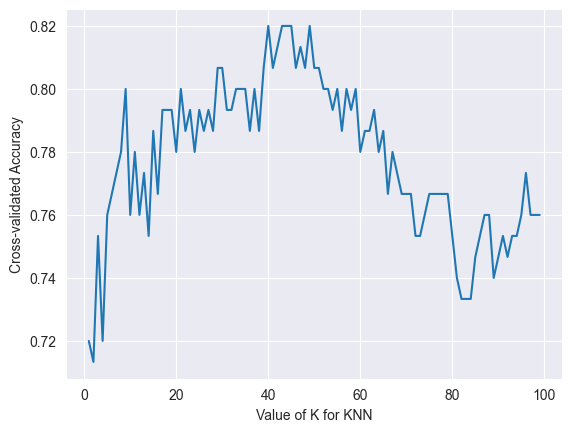

In [11]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated Accuracy')
plt.show();

### Weighted KNN

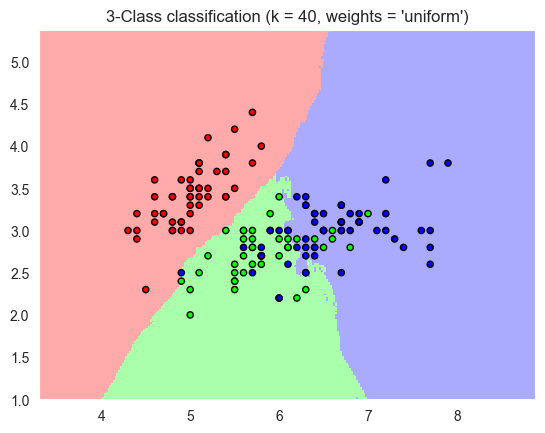

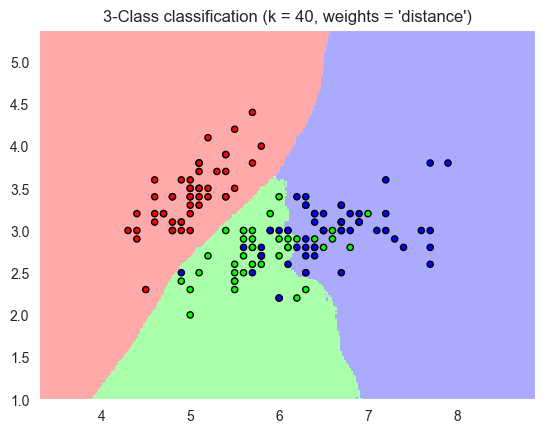

In [16]:
n_neighbors = 40
h = .02 # step size in the mesh

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show();

In [17]:
np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()
y[::5] += 1 * (0.5 - np.random.rand(8))

In [18]:
knn = neighbors.KNeighborsRegressor(n_neighbors)
y_ = knn.fit(X, y).predict(T)

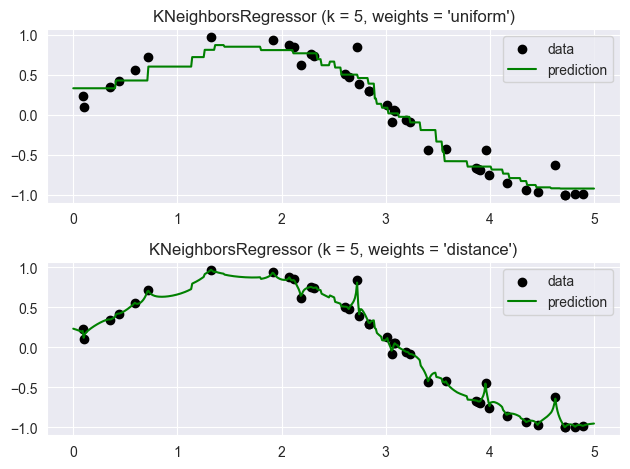

In [19]:
n_neighbors = 5

for i, weights in enumerate(['uniform', 'distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X, y).predict(T)

    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, c='k', label='data')
    plt.plot(T, y_, c='g', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,
                                                                weights))

plt.tight_layout()
plt.show()

## Decision Tree

- 모델링, 시각화 (#note_9-2) (#inflearn ML2) (#Raschka_1)
    - Feature importance 확인 (#inflearn ML2)
    - Decision boundary 시각화하기 (#inflearn ML2)
- 하이퍼파라미터 (#note_9-2)
- decision regression tree 모델 briefly (#note_9-2)

## Neural Network

- 퍼셉트론 구현 (#Raschka_1)
    - decision boundary 시각화하기 (#Raschka_1)
- 경사하강법 적용 적응형 선형 뉴런(AdalineGD) 구현 (#Raschka_1)
- 확률적 경사하강법 적용 적응형 선형 뉴런(AdalineSGD) 구현 (#Raschka_1)

# Unsupervised Learning

## K-Means

In [60]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [62]:
df = df_iris.copy()
X = df.iloc[:, :2]
y = df['target']

Text(0, 0.5, 'Sepal Width')

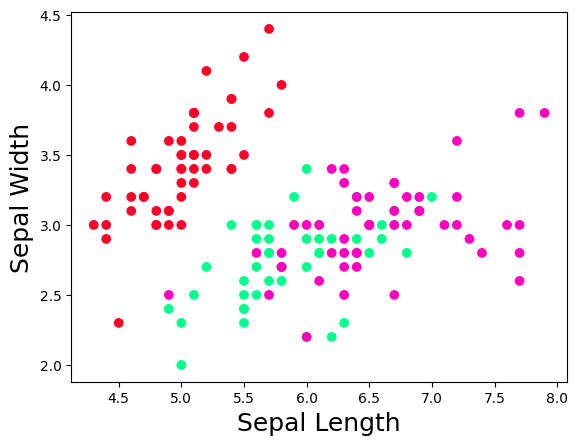

In [67]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='gist_rainbow')
plt.xlabel('Sepal Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)

In [70]:
km = KMeans(n_clusters = 3, random_state = 21)
km.fit(X)

KMeans(n_clusters=3, random_state=21)

In [74]:
centers = km.cluster_centers_
print(centers)

[[5.77358491 2.69245283]
 [5.006      3.428     ]
 [6.81276596 3.07446809]]


Text(0.5, 1.0, 'Predicted')

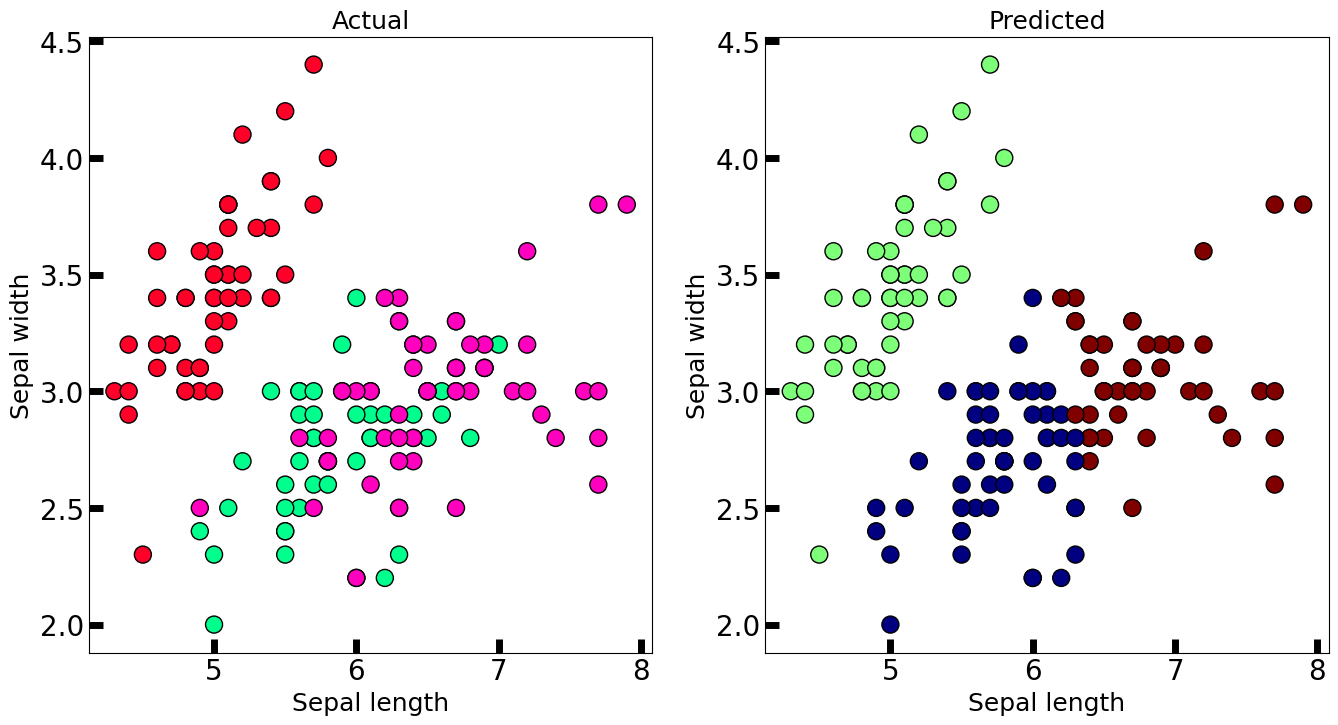

In [76]:
new_labels = km.labels_
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(X.iloc[:, 0], X.iloc[:, 1], c=new_labels, cmap='jet',
edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

### 2차원의 가상 데이터에 K-Means Clustering

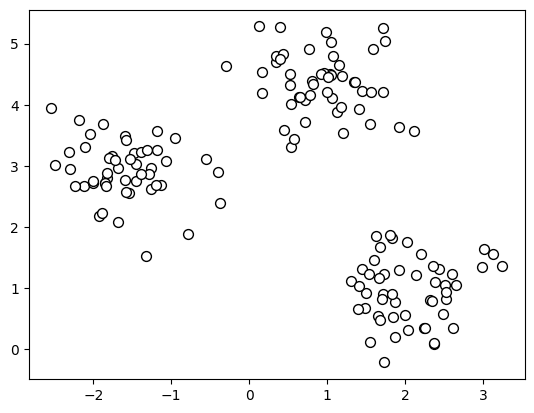

In [77]:
from sklearn.datasets import make_blobs

# create dataset
X, y = make_blobs(
    n_samples=150, n_features=2,
    centers=3, cluster_std=0.5,
    shuffle=True, random_state=0
)

# plot
plt.scatter(
    X[:, 0], X[:, 1],
    c='white', marker='o',
    edgecolors='black', s=50
)

plt.show()

In [78]:
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300,
    tol=1e-04, random_state=0
)

y_km = km.fit_predict(X)

In [79]:
y_km

array([1, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 2, 2, 0, 0, 2, 2, 1, 2, 1, 0, 1,
       0, 0, 2, 1, 1, 0, 2, 1, 2, 2, 2, 2, 0, 1, 1, 1, 0, 0, 2, 2, 0, 1,
       1, 1, 2, 0, 2, 0, 1, 0, 0, 1, 1, 2, 0, 1, 2, 0, 2, 2, 2, 2, 0, 2,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 2, 2, 0, 1, 1, 0, 0, 1, 1, 1, 2,
       2, 1, 1, 0, 1, 0, 1, 0, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 0, 0, 0,
       2, 0, 1, 2, 0, 2, 0, 0, 2, 2, 0, 1, 0, 0, 1, 1, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 1, 2, 2, 2, 2, 1, 1], dtype=int32)

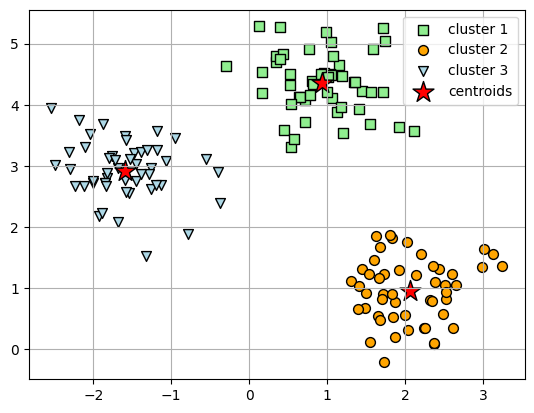

In [80]:
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [81]:
# K = 4 인 경우
km = KMeans(
    n_clusters=4, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)

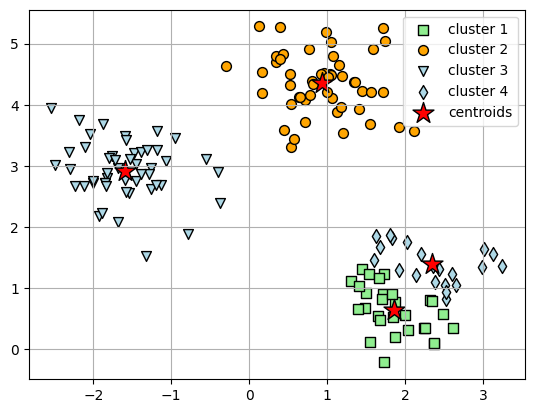

In [82]:
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)


plt.scatter(
    X[y_km == 3, 0], X[y_km == 3, 1],
    s=50, c='lightblue',
    marker='d', edgecolor='black',
    label='cluster 4'
)


# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

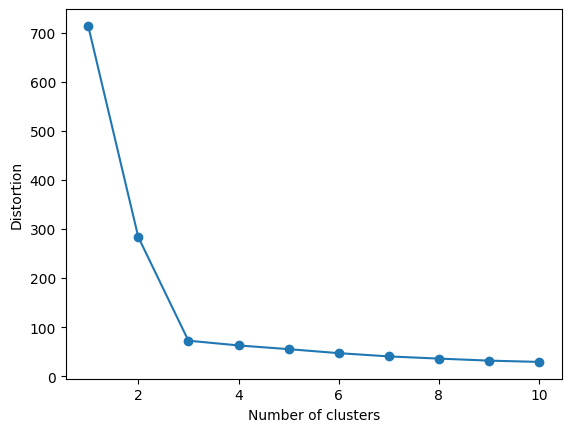

In [83]:
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)  # inertia: 군집 내 분산을 의미한다.

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

### K-Means for Text

In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

documents = ["This little kitty came to play when I was eating at a restaurant.","hello kitty is my favorite character",
             "Merley has the best squooshy kitten belly.","Is Google translator so good?","google google"
             "google Translate app is incredible.","My dog s name is Kong","dog dog dog","cat cat"
             "If you open 100 tab in google you get a smiley face.","Kong is a very cute and lovely dog",
             "Best cat photo I've ever taken.","This is a cat house"
             "Climbing ninja cat kitty.","What's your dog's name?","Cat s paws look like jelly",
             "Impressed with google map feedback.","I want to join google","You have to wear a collar when you walk the dog",
             "Key promoter extension for google Chrome.","Google is the best company","Google researcher"]

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

In [85]:
# documents를 vectorize한 것이다.
X.data

array([0.42166366, 0.42166366, 0.42166366, 0.42166366, 0.33316481,
       0.42166366, 0.52527722, 0.52527722, 0.52527722, 0.41503194,
       0.46502628, 0.46502628, 0.46502628, 0.36742648, 0.46502628,
       0.65987374, 0.65987374, 0.35935122, 0.48243568, 0.48243568,
       0.48243568, 0.48243568, 0.26272276, 0.79587603, 0.60545961,
       1.        , 0.3829578 , 0.3829578 , 0.3829578 , 0.3829578 ,
       0.3829578 , 0.3829578 , 0.27670749, 0.20854952, 0.55772163,
       0.55772163, 0.489249  , 0.37219428, 0.49109535, 0.49109535,
       0.49109535, 0.35484266, 0.38802417, 0.46064741, 0.46064741,
       0.66568477, 0.36396664, 1.        , 0.47025206, 0.47025206,
       0.47025206, 0.47025206, 0.33978227, 0.5507688 , 0.5507688 ,
       0.5507688 , 0.29993532, 0.65987374, 0.65987374, 0.35935122,
       0.53874485, 0.53874485, 0.53874485, 0.35953018, 0.48243568,
       0.48243568, 0.48243568, 0.48243568, 0.26272276, 0.72152776,
       0.39292651, 0.57009338, 0.87821982, 0.4782572 ])

In [86]:
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(max_iter=100, n_clusters=3, n_init=1)

In [89]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

In [90]:
model.labels_

array([0, 0, 0, 2, 2, 0, 0, 1, 0, 1, 1, 0, 1, 2, 2, 0, 2, 2, 2],
      dtype=int32)

In [91]:
[x for x, y in zip(documents, model.labels_) if  y == 0]

['This little kitty came to play when I was eating at a restaurant.',
 'hello kitty is my favorite character',
 'Merley has the best squooshy kitten belly.',
 'My dog s name is Kong',
 'dog dog dog',
 'Kong is a very cute and lovely dog',
 "What's your dog's name?",
 'You have to wear a collar when you walk the dog']

In [92]:
[x for x, y in zip(documents, model.labels_) if  y == 1]

['cat catIf you open 100 tab in google you get a smiley face.',
 "Best cat photo I've ever taken.",
 'This is a cat houseClimbing ninja cat kitty.',
 'Cat s paws look like jelly']

In [93]:
[x for x, y in zip(documents, model.labels_) if  y == 2]

['Is Google translator so good?',
 'google googlegoogle Translate app is incredible.',
 'Impressed with google map feedback.',
 'I want to join google',
 'Key promoter extension for google Chrome.',
 'Google is the best company',
 'Google researcher']

In [94]:
Y = vectorizer.transform(["chrome browser to open."])
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform(["I want to have a dog"])
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform(["My cat is hungry."])
prediction = model.predict(Y)
print(prediction)

[2]
[0]
[1]


## Hierearchical Clustering

## DBSCAN

# Ensemble

직접 다수결 투표 분류기 구현 (#Raschka_3)
Bagging
Boosting
XGBoost
Gradient Boosting
LightGBM
Pipeline
랜덤포레스트
특성중요도 (#Raschka_2)
SHAP value

# Deep Learning

## Deep Neural Network from Scratch

## CNN

## RNN

## GAN

## Transfer Learning